In [46]:
import os
import time
import math
import heapq
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.ioff()

In [47]:
class Node:
    def __init__(self, coordinates, parent, gvalue, hvalue):
        self.coordinates = coordinates
        self.parent = parent
        self.gvalue = gvalue
        self.hvalue = hvalue
        self.fvalue = self.gvalue + self.hvalue


    def __lt__(self, other):
        return self.fvalue < other.fvalue or (self.fvalue == other.fvalue and self.gvalue > other.gvalue)

In [48]:
def forwardAStar(maze, beginningCoordinates, endingCoordinates, sizeOfGrid, numberOfExpandedNodes, console):
    openList = [] #heap
    closedList = []
    numberOfExpandedNodes = 0
    beginningNode = Node(beginningCoordinates, None, 0, getManhattanDistance(beginningCoordinates, endingCoordinates))
    openList.append(beginningNode)

    while openList[0].coordinates != endingCoordinates: #while first priority node isnt the goal node
        poppedNode = heapq.heappop(openList) #remove first priority from open list and add to closed list and expand it
        closedList.append(poppedNode)
        #expand the popped node
        potentialCoordinates = []
        potentialCoordinates.append(generateLeftCoordinates(poppedNode.coordinates))
        potentialCoordinates.append(generateRightCoordinates(poppedNode.coordinates))
        potentialCoordinates.append(generateUpCoordinates(poppedNode.coordinates))
        potentialCoordinates.append(generateDownCoordinates(poppedNode.coordinates))
        for coordinate in potentialCoordinates:
            if isValidCoordinate(coordinate, maze, sizeOfGrid):
                #if the neighbor has valid coordinates and is not in closed list or in the open list, add that node in the open list
                if not(inClosed(coordinate, closedList)) and inOpen(coordinate, openList) == -1:
                    heapq.heappush(openList, Node(coordinate, poppedNode, poppedNode.gvalue + 1, getManhattanDistance(coordinate, endingCoordinates)))
                    numberOfExpandedNodes = numberOfExpandedNodes + 1
                    if console:
                        print(numberOfExpandedNodes)
                #if the neighbor has valid cooridnates and is not in closed list but is in open list
                elif not(inClosed(coordinate, closedList)) and inOpen(coordinate, openList) != -1:
                    #check if current distance can be improved
                    if openList[inOpen(coordinate, openList)].fvalue > (poppedNode.gvalue + 1 + getManhattanDistance(coordinate, endingCoordinates)):
                        #change fvalue, g value, h value, change parent
                        openList[inOpen(coordinate, openList)].gvalue = poppedNode.gvalue + 1 
                        openList[inOpen(coordinate, openList)].hvalue = getManhattanDistance(coordinate, endingCoordinates)
                        openList[inOpen(coordinate, openList)].fvalue = poppedNode.gvalue + 1 + getManhattanDistance(coordinate, endingCoordinates)
                        openList[inOpen(coordinate, openList)].parent = poppedNode
        if len(openList) == 0:
            return []
    
    
    plannedPath = []
    goalNode = heapq.heappop(openList)
    currentNode = goalNode
    while currentNode !=  None:
        plannedPath.append(currentNode.coordinates)
        currentNode = currentNode.parent
    #return planned path
    plannedPath.reverse()
    return plannedPath


def generateLeftCoordinates(currentCoordinates):
    return (currentCoordinates[0]-1, currentCoordinates[1])
def generateRightCoordinates(currentCoordinates):
    return (currentCoordinates[0]+1, currentCoordinates[1])
def generateUpCoordinates(currentCoordinates):
    return (currentCoordinates[0], currentCoordinates[1]+1)
def generateDownCoordinates(currentCoordinates):
    return (currentCoordinates[0], currentCoordinates[1]-1)

def getManhattanDistance(currentCoordinates, endingCoordinates):
    return abs(endingCoordinates[0] - currentCoordinates[0]) + abs(endingCoordinates[1] - currentCoordinates[1])

def isValidCoordinate(currentCoordinates, maze, sizeOfGrid):
    return 0<=currentCoordinates[0]<=sizeOfGrid-1 and 0<=currentCoordinates[1]<=sizeOfGrid-1 and maze[currentCoordinates[0]][currentCoordinates[1]] != 1

def inClosed(currentCoordinates, closedList):
    for node in closedList:
        if node.coordinates == currentCoordinates:
            return True

    return False

def inOpen(currentCoordinates, openList):
    for index, w in enumerate(openList):
        if w.coordinates == currentCoordinates:
            return index

    return -1

In [49]:
def repeatedAStar(knowledgeMaze, trueMaze, beginningCoordinates, endingCoordinates, sizeOfGrid, console):
    plannedPaths = []
    knowledgeMazes = []
    numberOfExpandedNodes = 0

    currentKnowledgeMaze = knowledgeMaze
    beginning = beginningCoordinates
    ending = endingCoordinates
    while True:
        #planning
        knowledgeMazes.append(currentKnowledgeMaze)
        currentPath = forwardAStar(currentKnowledgeMaze, beginning, ending, sizeOfGrid, numberOfExpandedNodes, console)
        if(console):
            print("current path")
            print(currentPath)
        plannedPaths.append(currentPath)
        if currentPath == []:
            return [plannedPaths, knowledgeMazes]
        #execute
        #step through planned path
        #if current node is actually an obstacle, stop there and save that coordinate as the beginning coordinate for next iteration
        #if current node is the end node, stop there and return all needed info
        #otherwise, look at neighbors of the current node and see if they are obstacles in true maze. if so, plot these obstacles in the knowledge maze and insert updated knowledge maze
        currentKnowledgeMaze = np.copy(knowledgeMazes[-1])

        for index, w in enumerate(currentPath):
            if trueMaze[w[0]][w[1]] == 1:
                #update beginning to coordinates right before obstacle bump
                beginning = currentPath[index-1]
                break
            if w == endingCoordinates: #if the path executed actually makes it to the end, we're done
                return [plannedPaths,knowledgeMazes]
            neighbors = [] #generate all neighbors
            currentCoordinate = currentPath[index]
            neighbors.append(generateLeftCoordinates(currentCoordinate))
            neighbors.append(generateRightCoordinates(currentCoordinate))
            neighbors.append(generateUpCoordinates(currentCoordinate))
            neighbors.append(generateDownCoordinates(currentCoordinate))
            #check if each neighbor is valid and is an obstacle --> if it is, update the knowledge maze
            for neighbor in neighbors:
                if isValidCoordinate_2(neighbor, sizeOfGrid) and trueMaze[neighbor[0]][neighbor[1]] == 1:
                    currentKnowledgeMaze[neighbor[0]][neighbor[1]] = 1 #without assigning 1, it is an infinite loop?
            


def isValidCoordinate_2(currentCoordinates, sizeOfGrid):
    return 0<=currentCoordinates[0]<=sizeOfGrid-1 and 0<=currentCoordinates[1]<=sizeOfGrid-1    


<IPython.core.display.Javascript object>


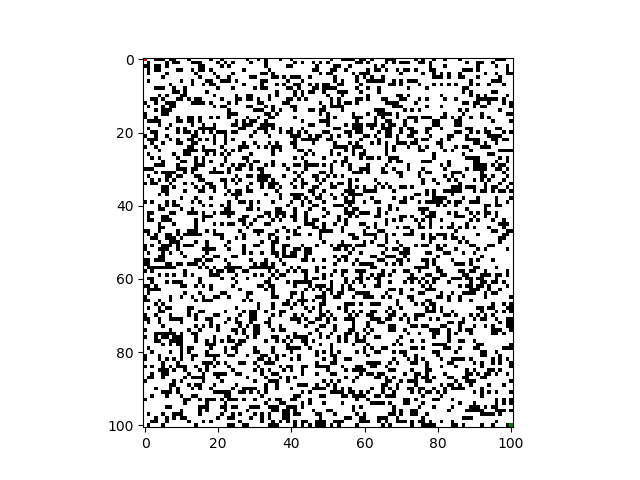

<IPython.core.display.Javascript object>


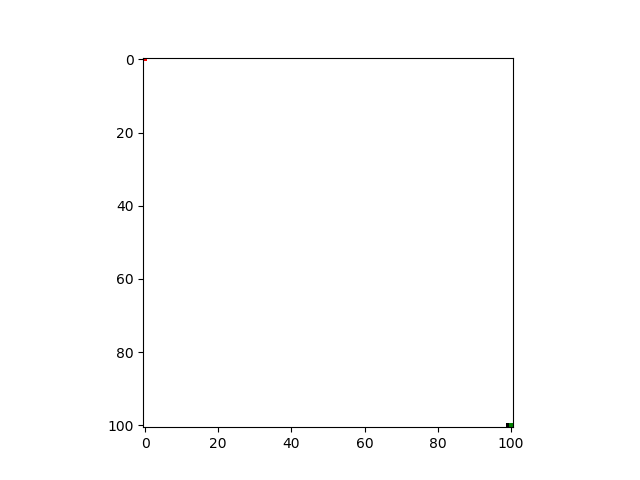

<IPython.core.display.Javascript object>


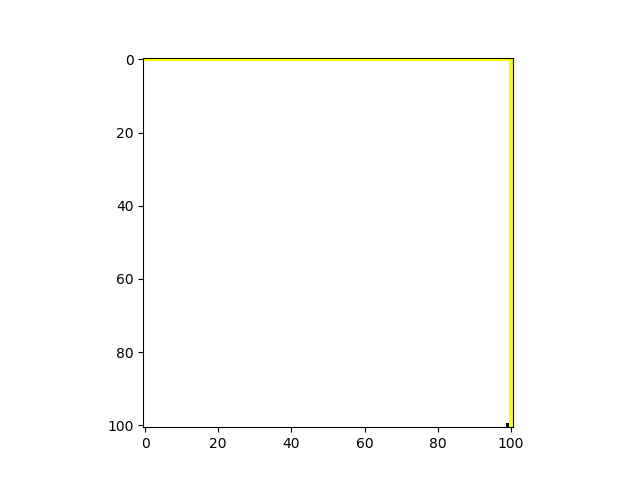

<IPython.core.display.Javascript object>


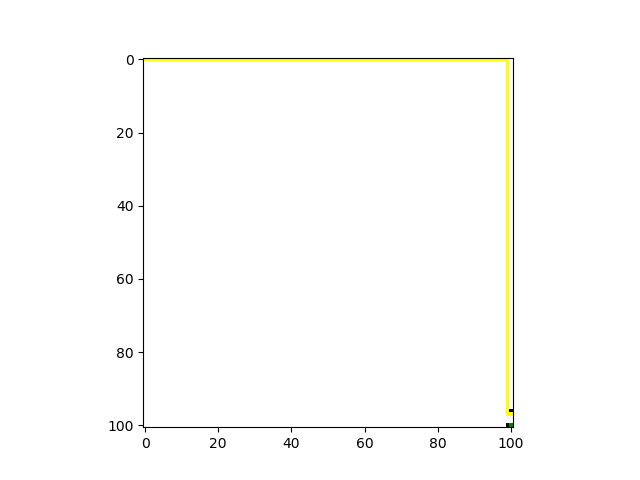

<IPython.core.display.Javascript object>


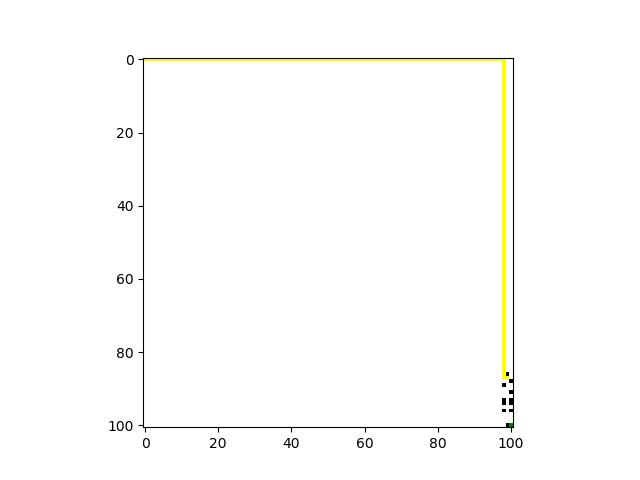

<IPython.core.display.Javascript object>


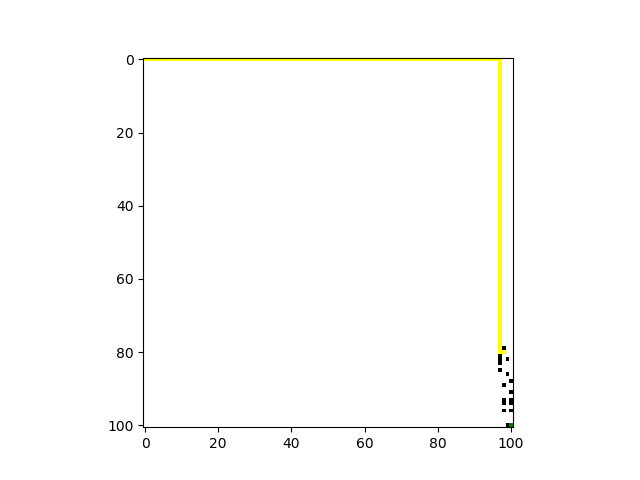

<IPython.core.display.Javascript object>


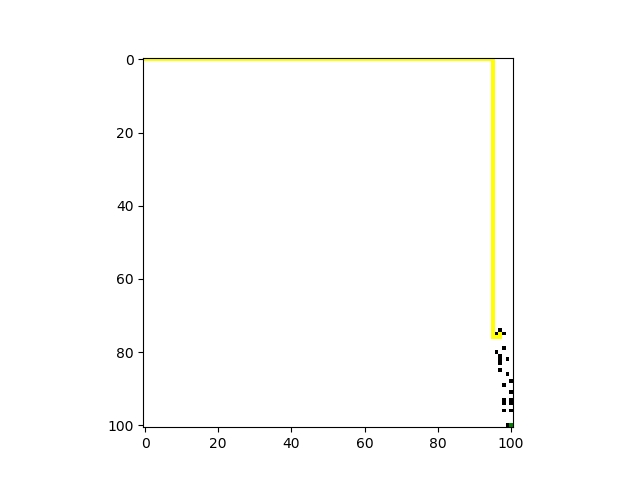

<IPython.core.display.Javascript object>


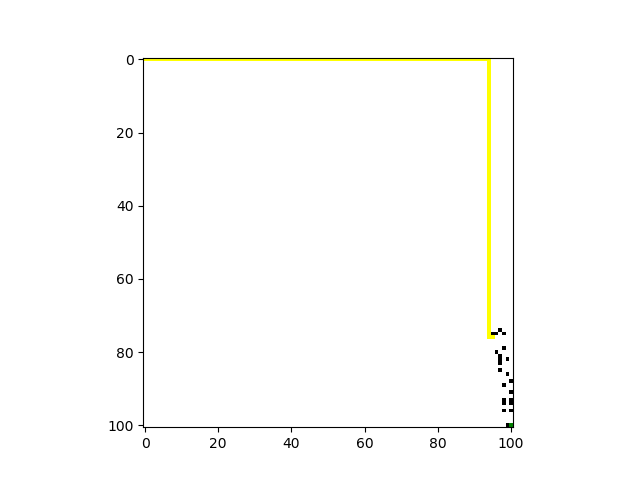

<IPython.core.display.Javascript object>


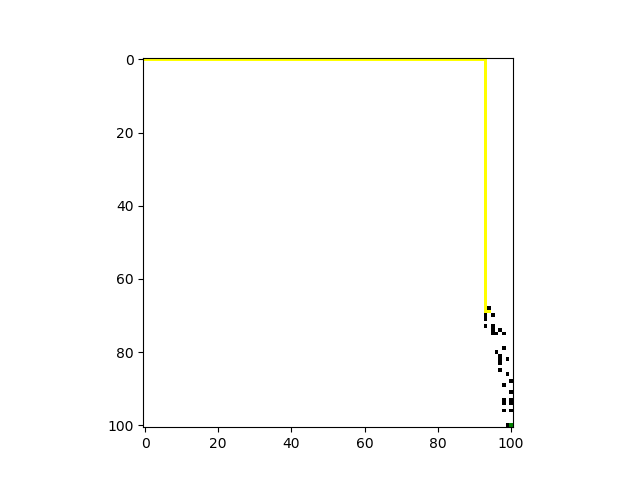

<IPython.core.display.Javascript object>


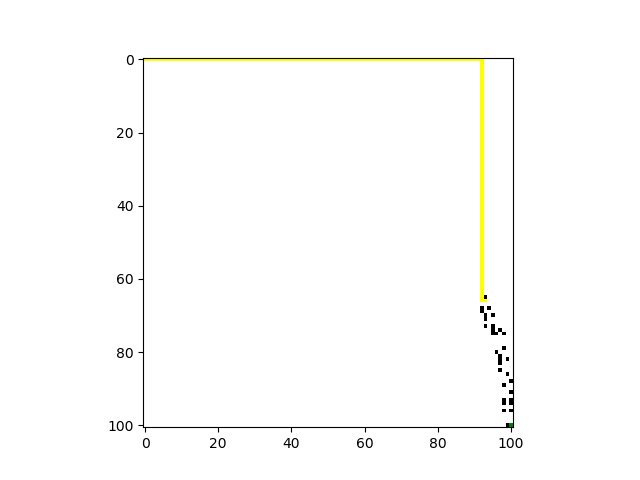

<IPython.core.display.Javascript object>


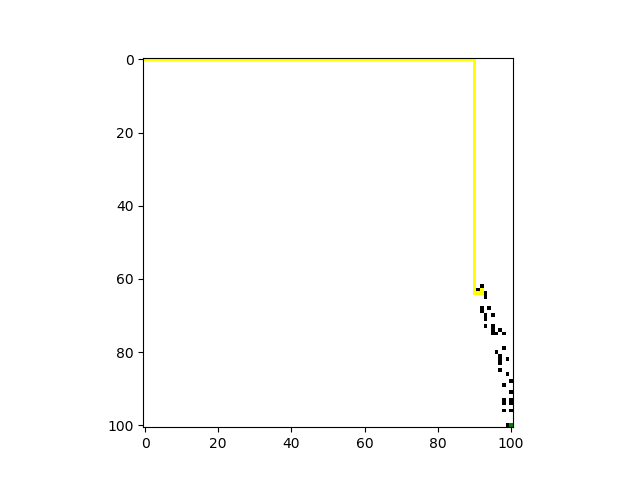

<IPython.core.display.Javascript object>


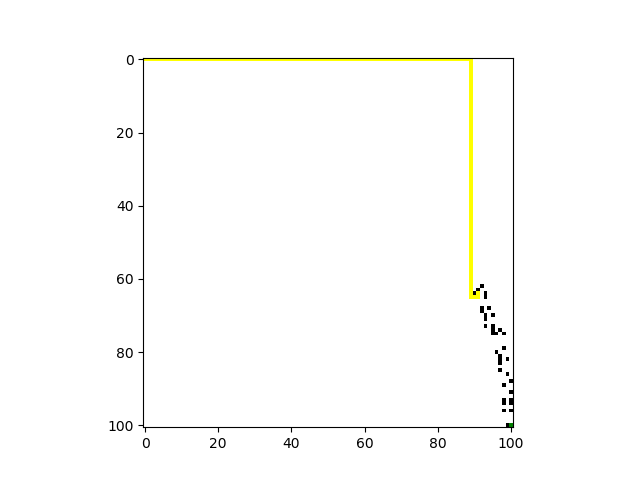

<IPython.core.display.Javascript object>


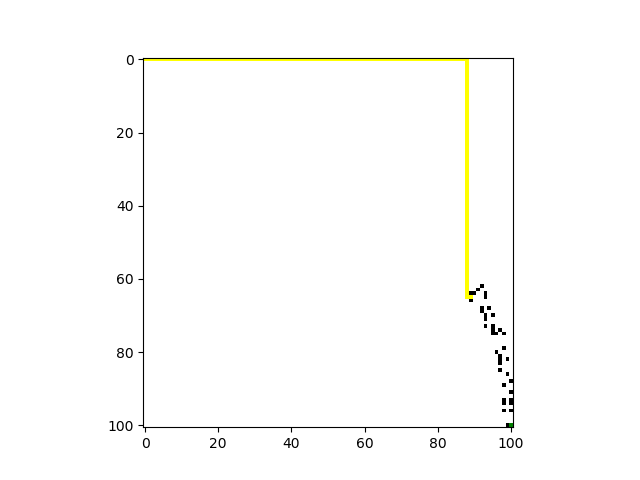

<IPython.core.display.Javascript object>


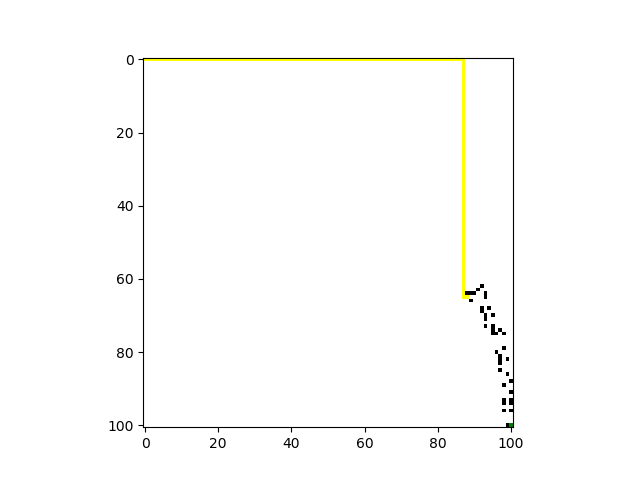

<IPython.core.display.Javascript object>


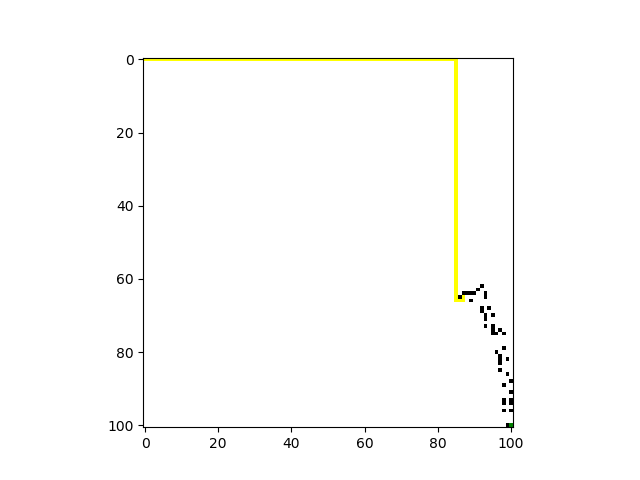

<IPython.core.display.Javascript object>


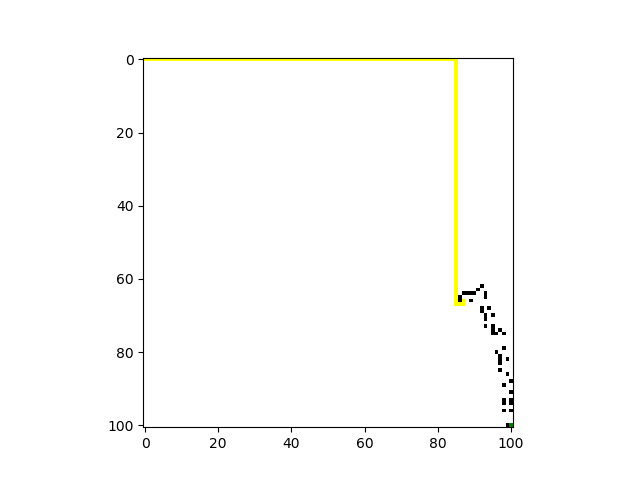

<IPython.core.display.Javascript object>


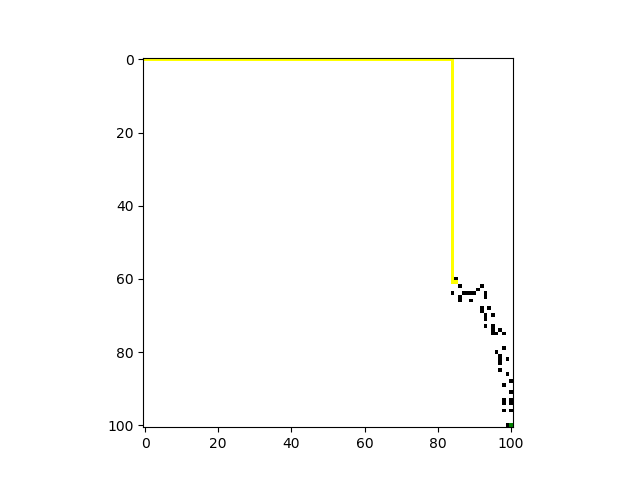

<IPython.core.display.Javascript object>


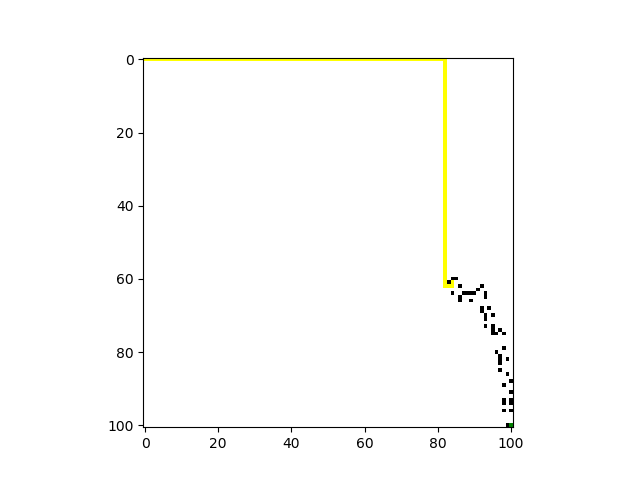

<IPython.core.display.Javascript object>


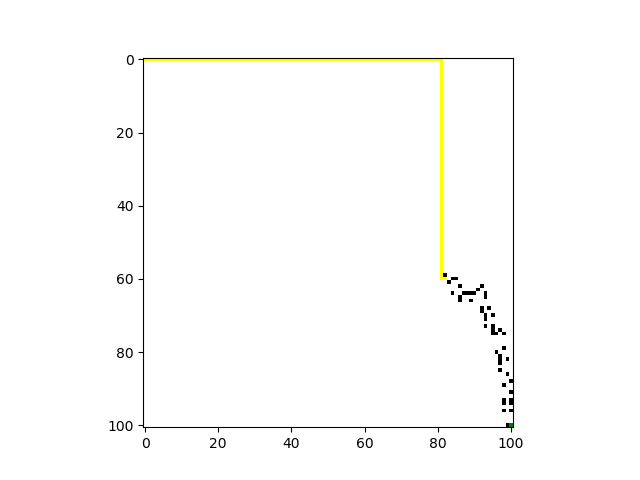

<IPython.core.display.Javascript object>


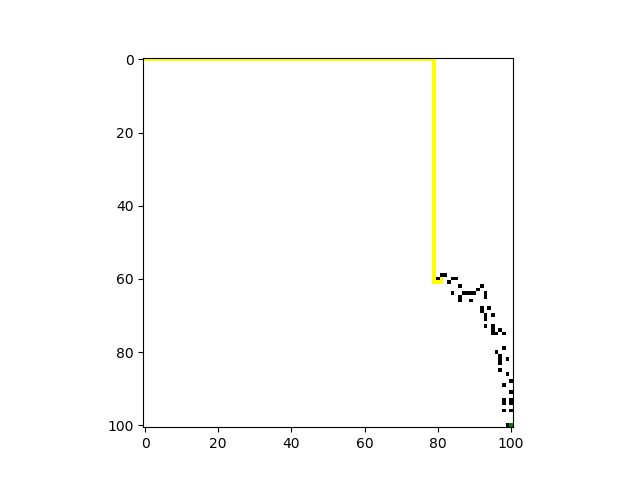

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


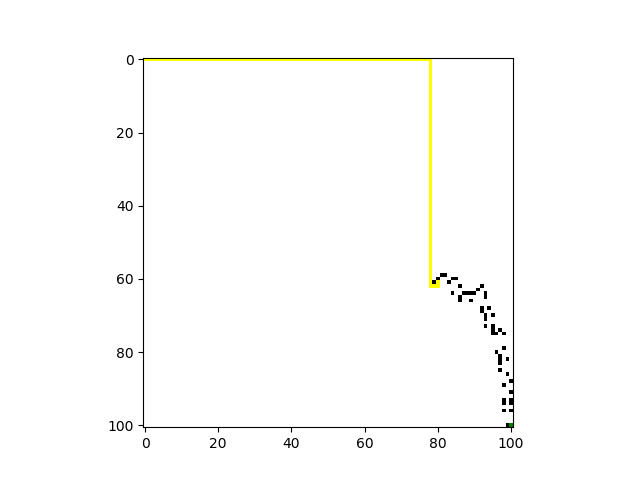

<IPython.core.display.Javascript object>


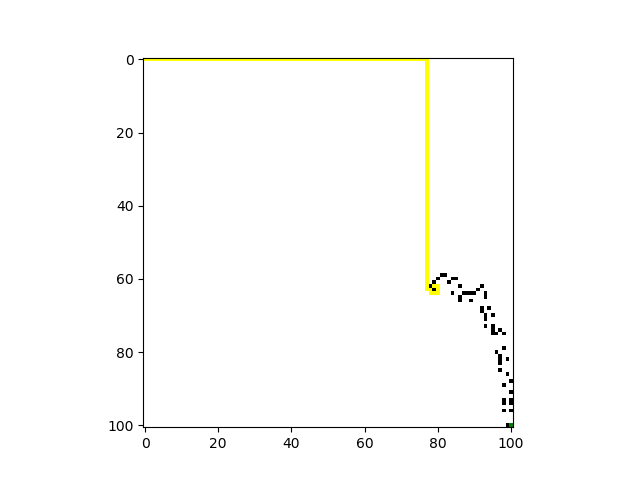

<IPython.core.display.Javascript object>


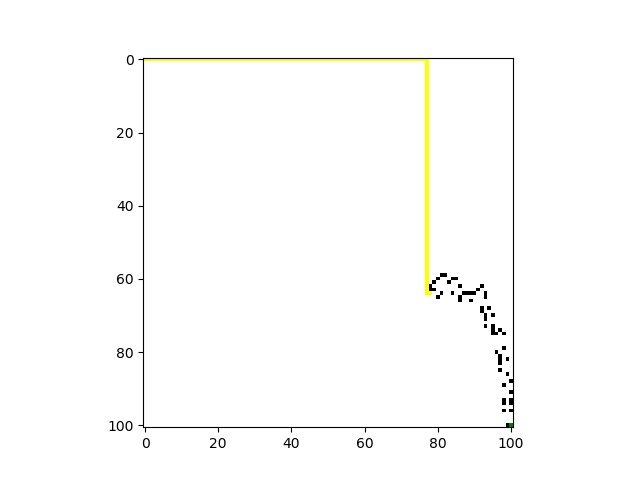

<IPython.core.display.Javascript object>


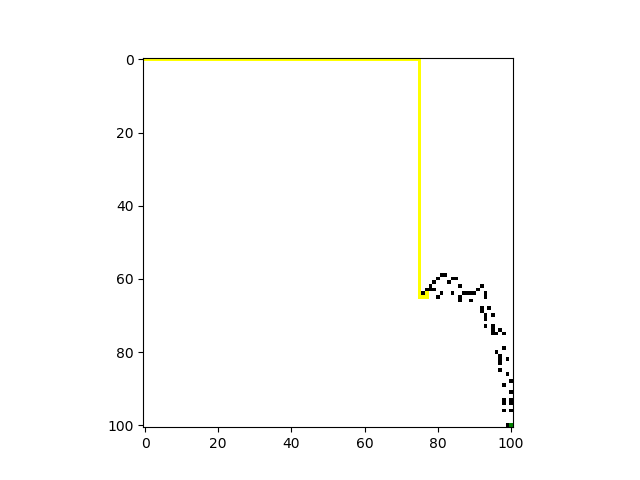

<IPython.core.display.Javascript object>


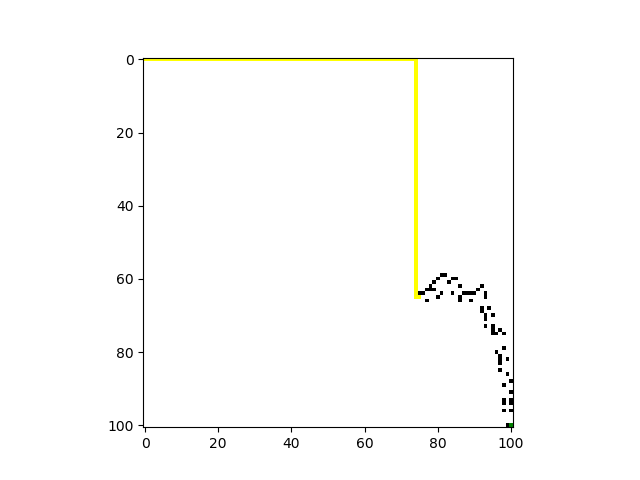

<IPython.core.display.Javascript object>


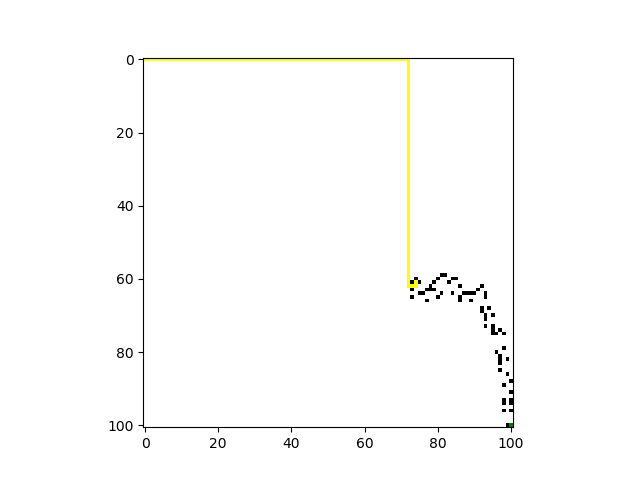

<IPython.core.display.Javascript object>


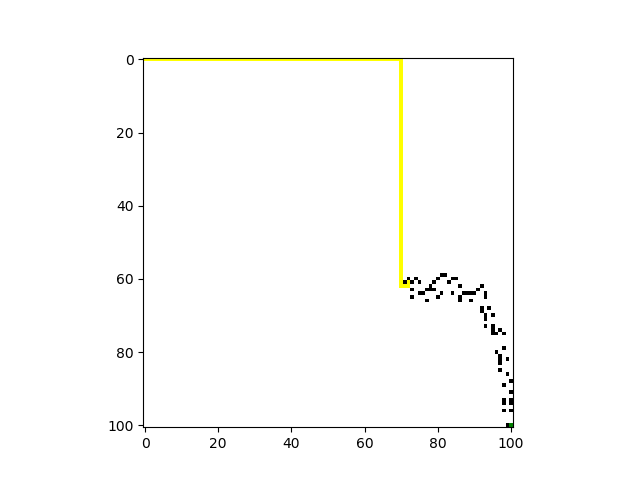

<IPython.core.display.Javascript object>


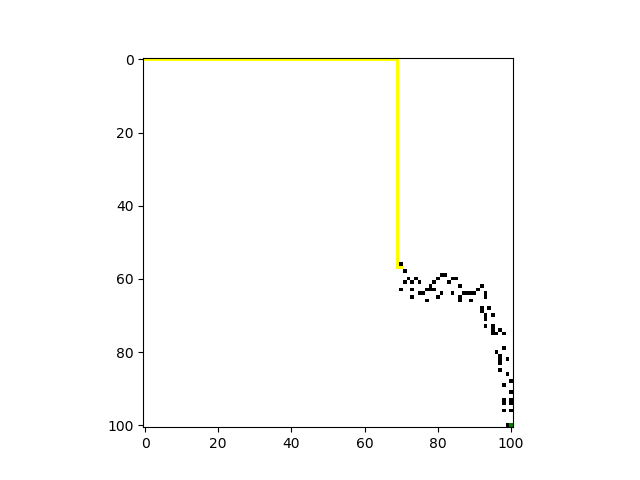

<IPython.core.display.Javascript object>


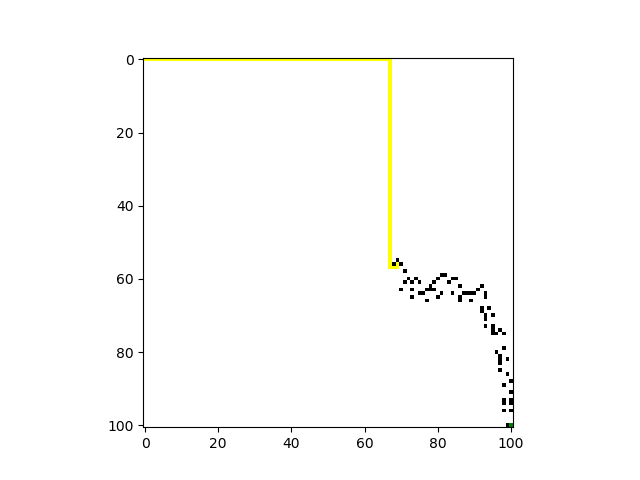

<IPython.core.display.Javascript object>


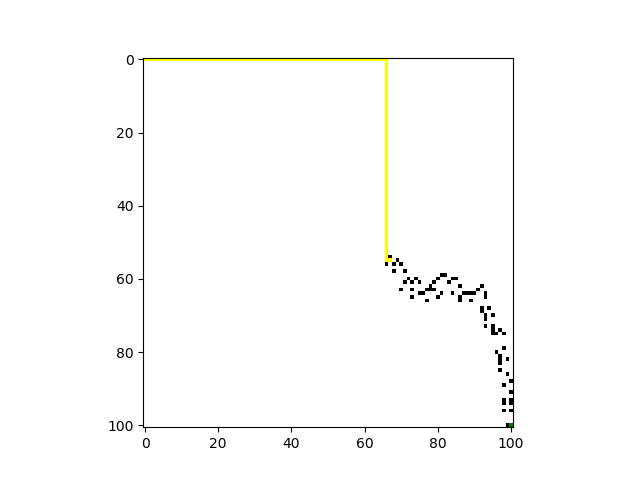

<IPython.core.display.Javascript object>


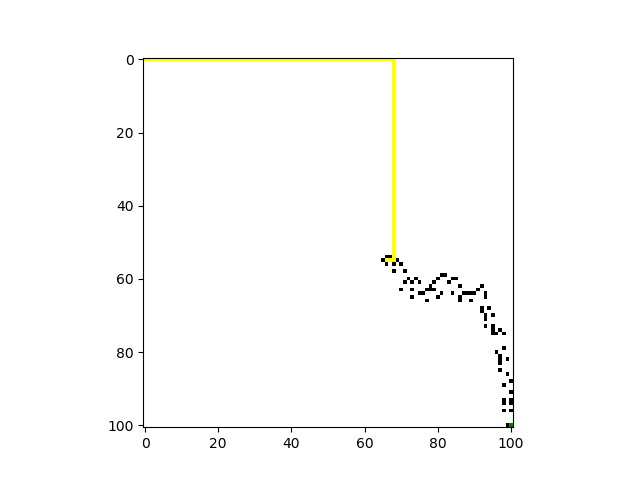

<IPython.core.display.Javascript object>


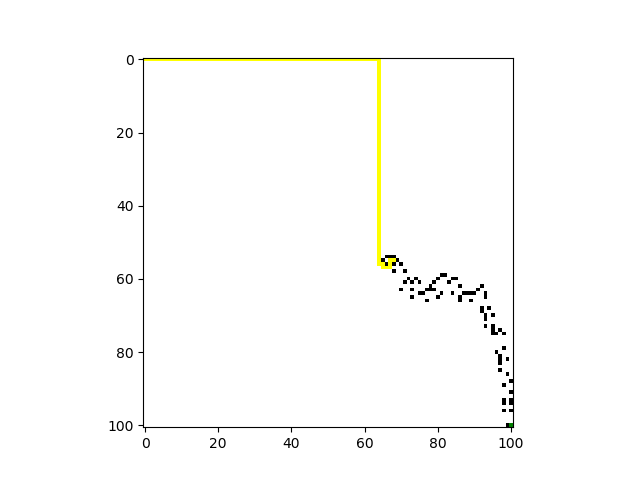

<IPython.core.display.Javascript object>


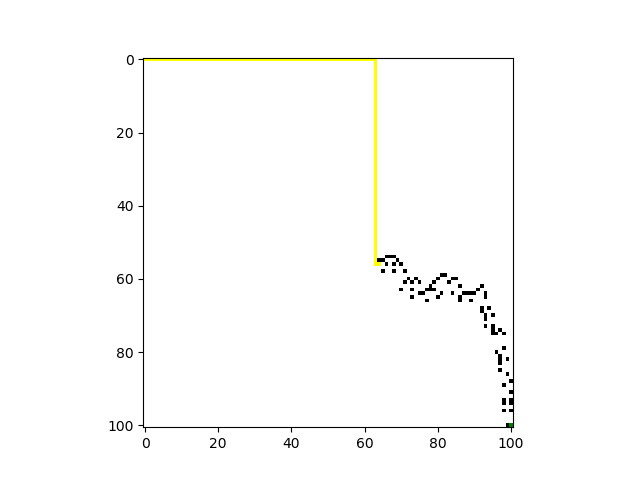

<IPython.core.display.Javascript object>


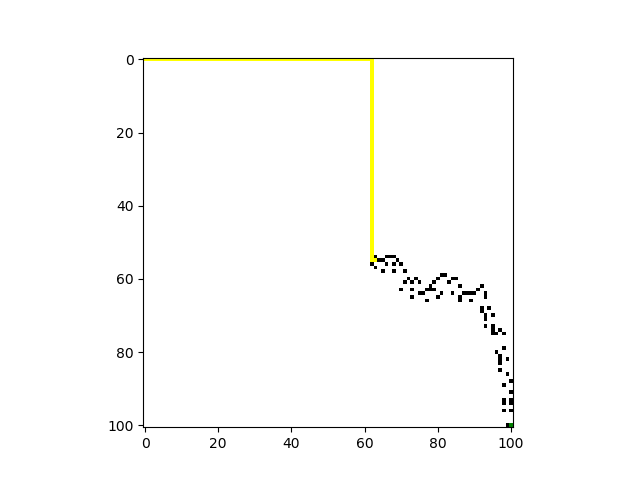

<IPython.core.display.Javascript object>


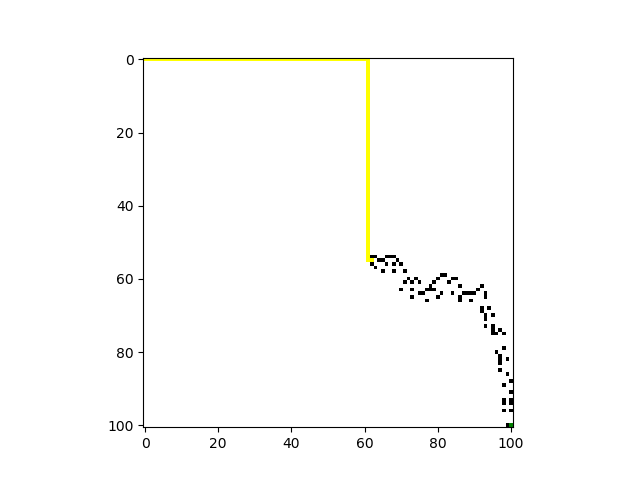

<IPython.core.display.Javascript object>


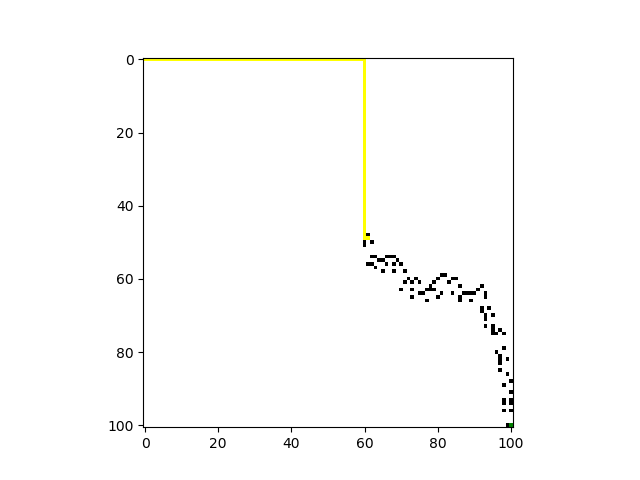

<IPython.core.display.Javascript object>


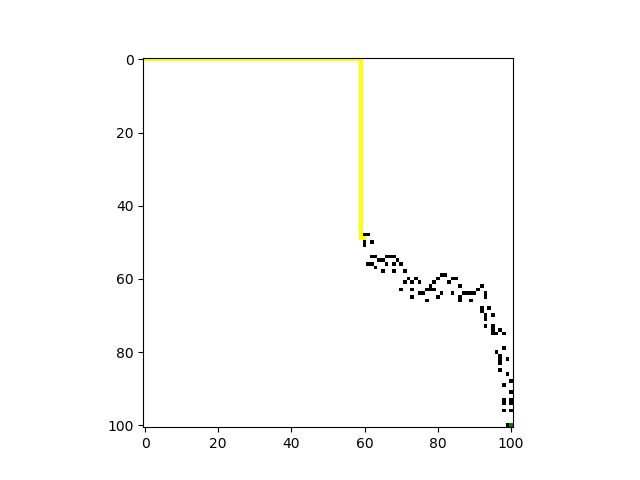

<IPython.core.display.Javascript object>


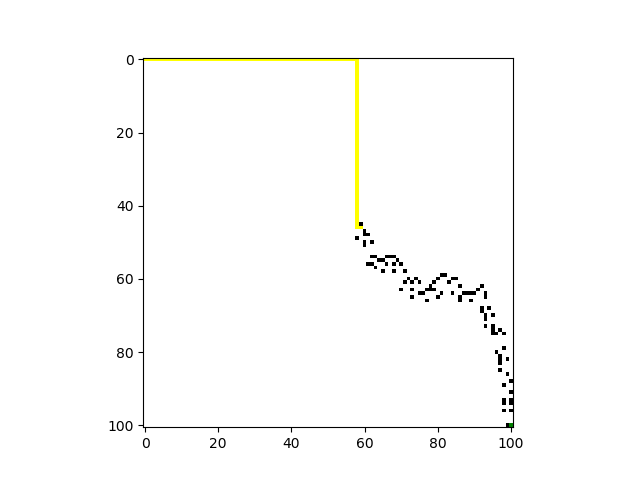

<IPython.core.display.Javascript object>


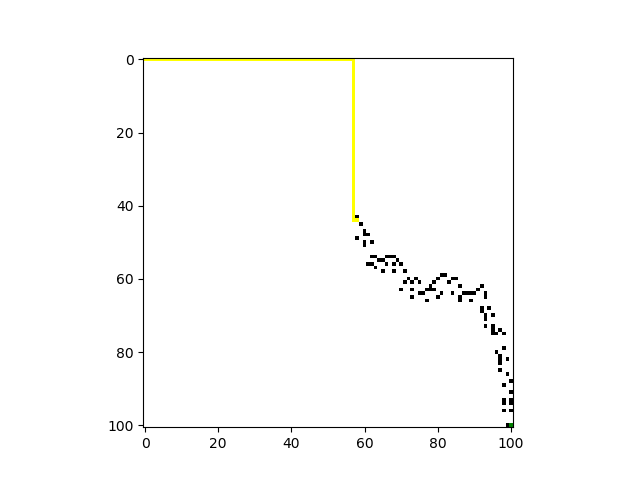

<IPython.core.display.Javascript object>


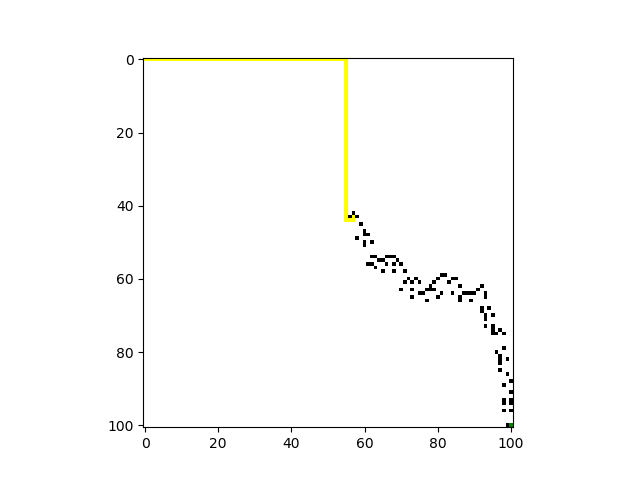

<IPython.core.display.Javascript object>


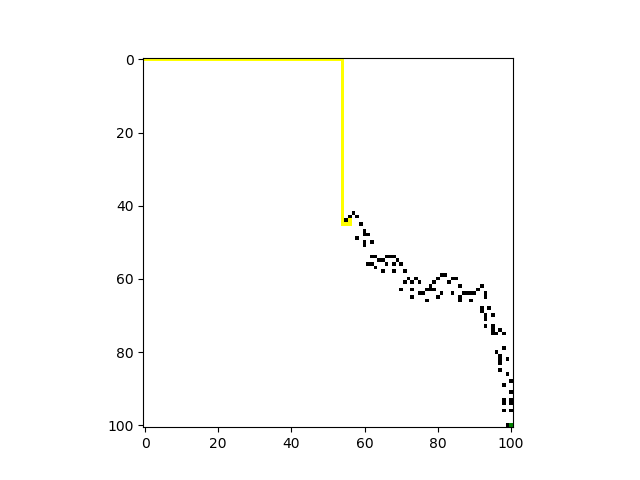

<IPython.core.display.Javascript object>


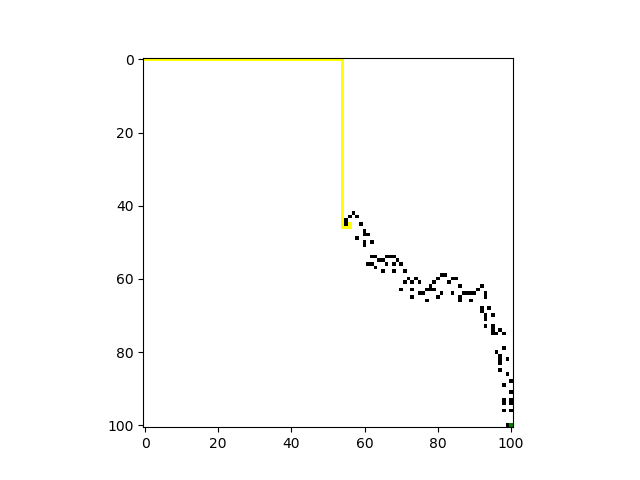

<IPython.core.display.Javascript object>


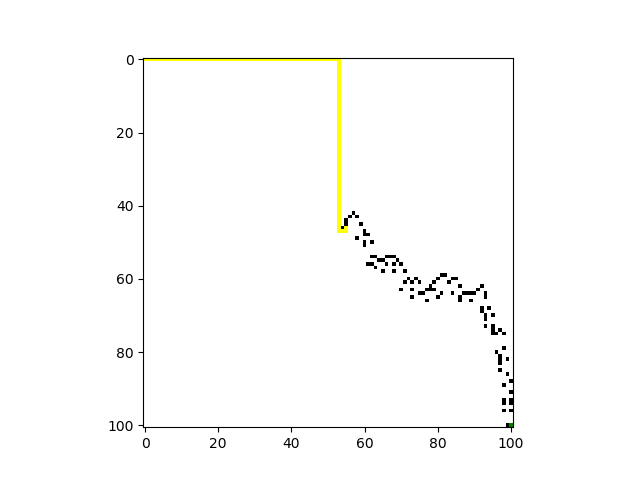

<IPython.core.display.Javascript object>


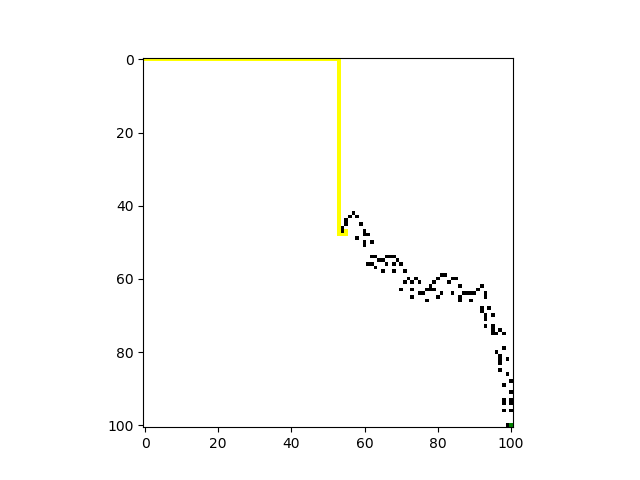

<IPython.core.display.Javascript object>


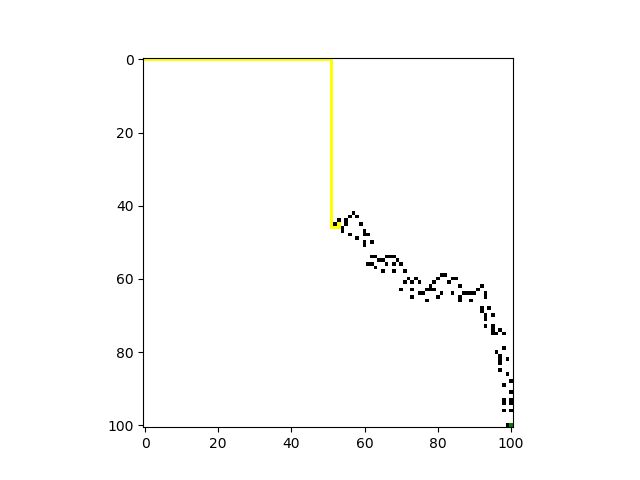

<IPython.core.display.Javascript object>


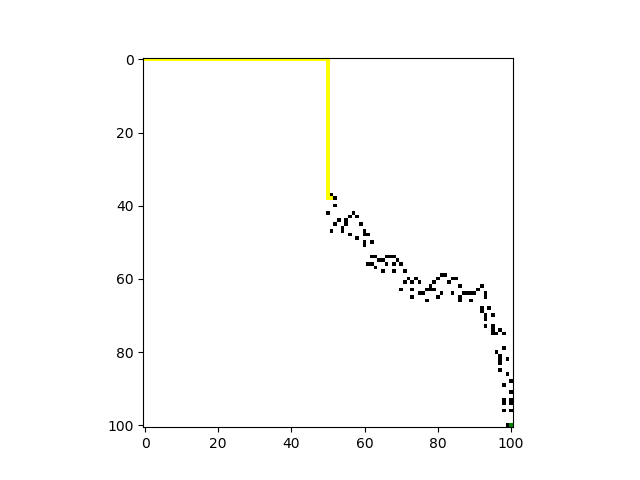

<IPython.core.display.Javascript object>


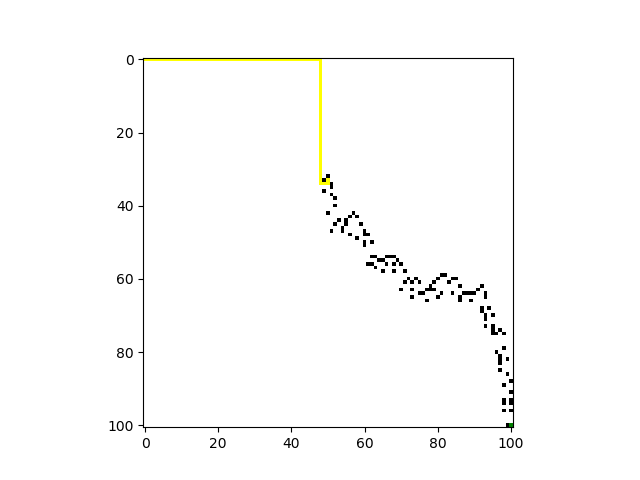

<IPython.core.display.Javascript object>


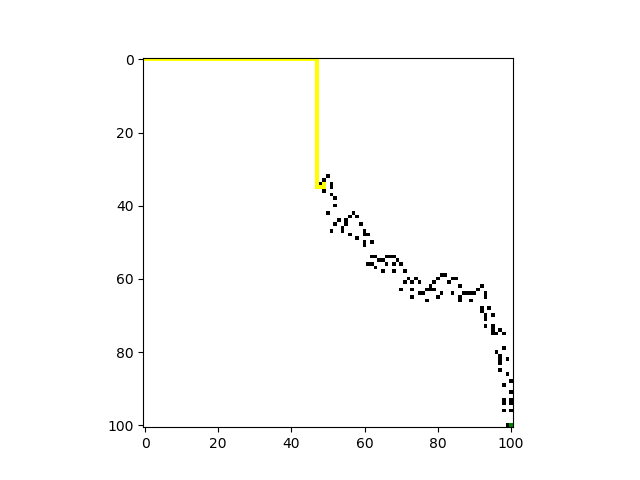

<IPython.core.display.Javascript object>


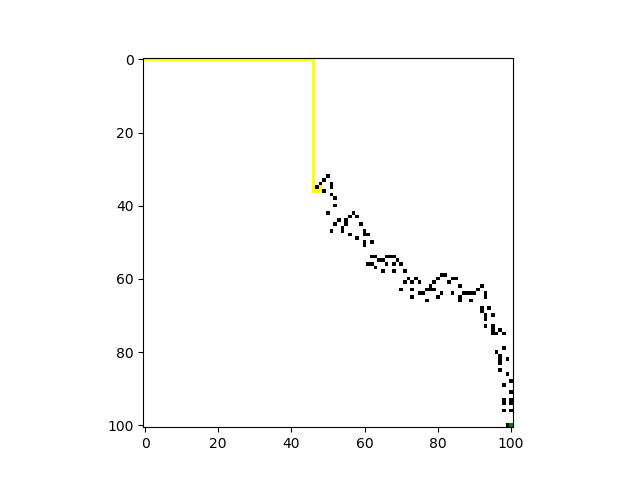

<IPython.core.display.Javascript object>


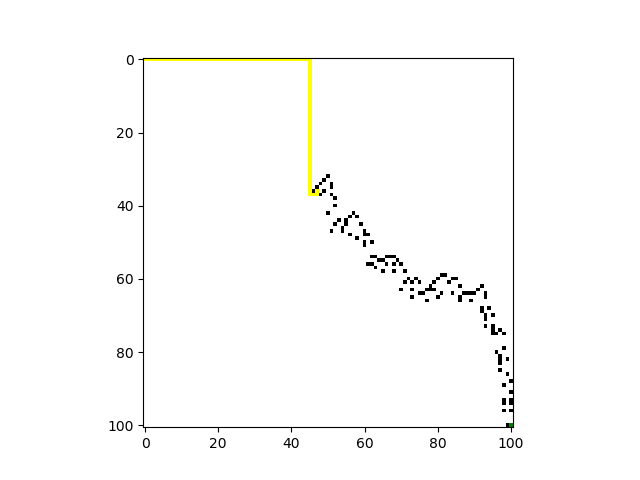

<IPython.core.display.Javascript object>


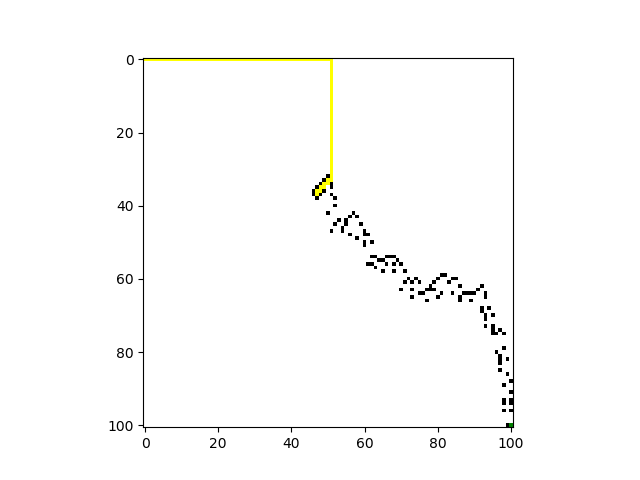

<IPython.core.display.Javascript object>


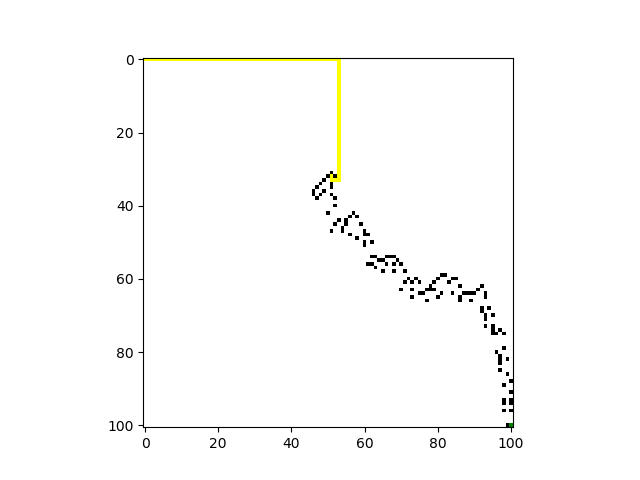

<IPython.core.display.Javascript object>


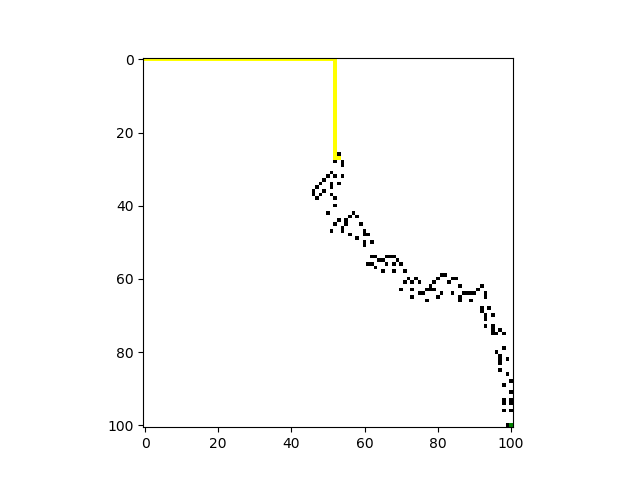

<IPython.core.display.Javascript object>


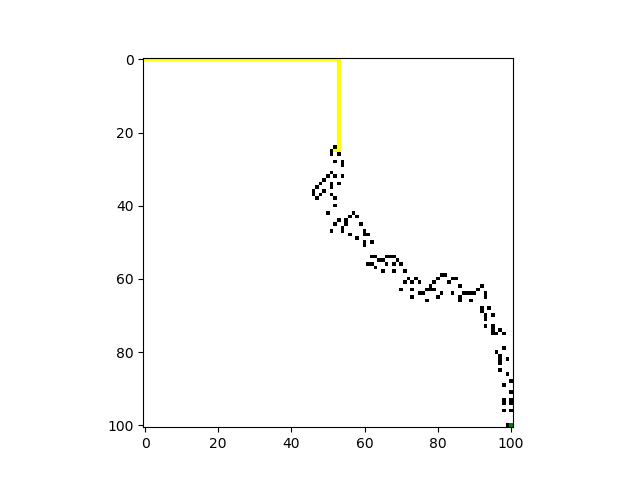

<IPython.core.display.Javascript object>


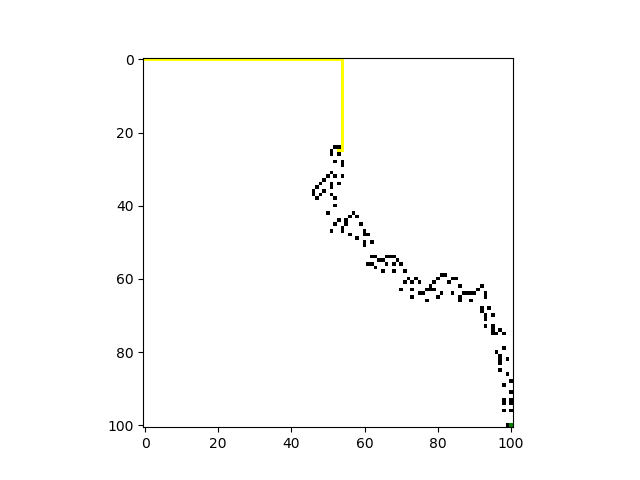

<IPython.core.display.Javascript object>


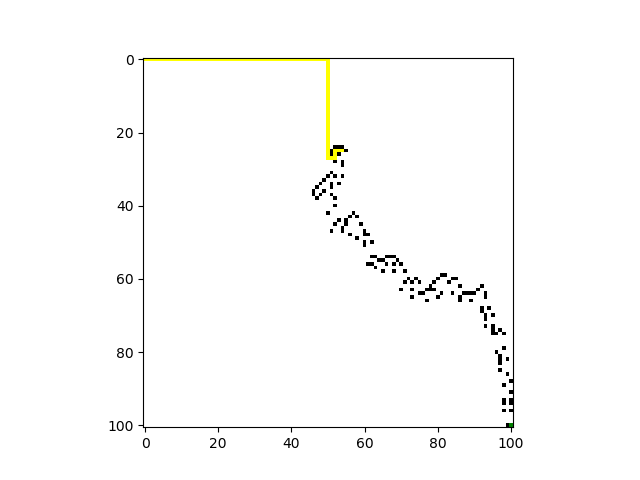

<IPython.core.display.Javascript object>


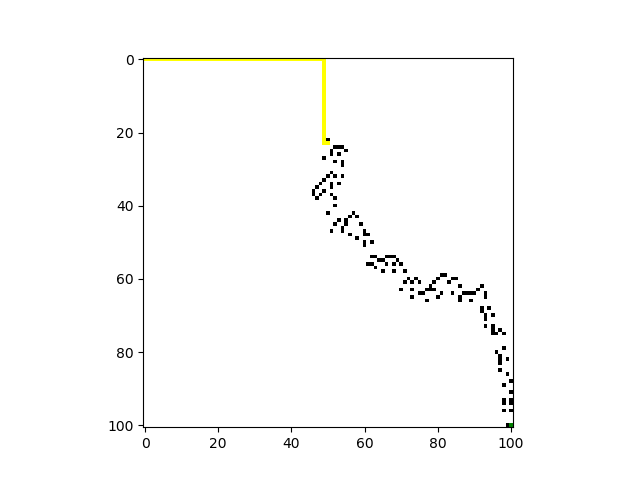

<IPython.core.display.Javascript object>


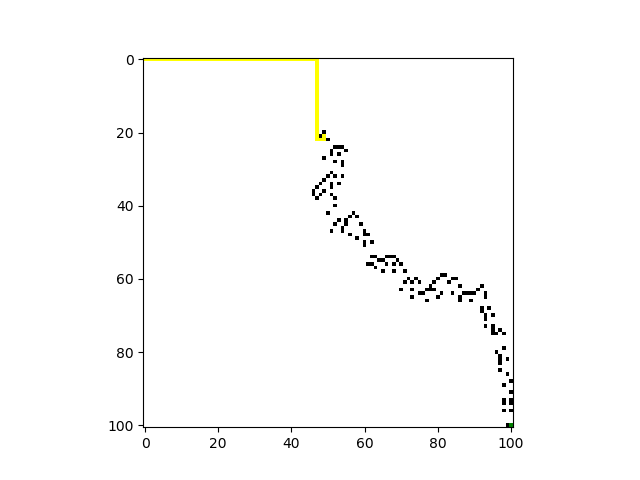

<IPython.core.display.Javascript object>


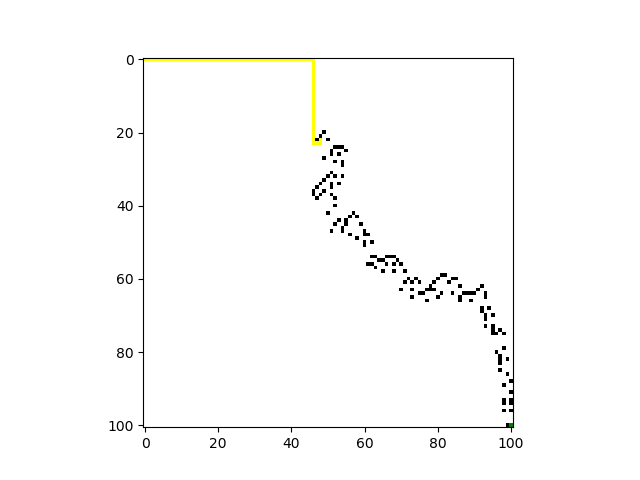

<IPython.core.display.Javascript object>


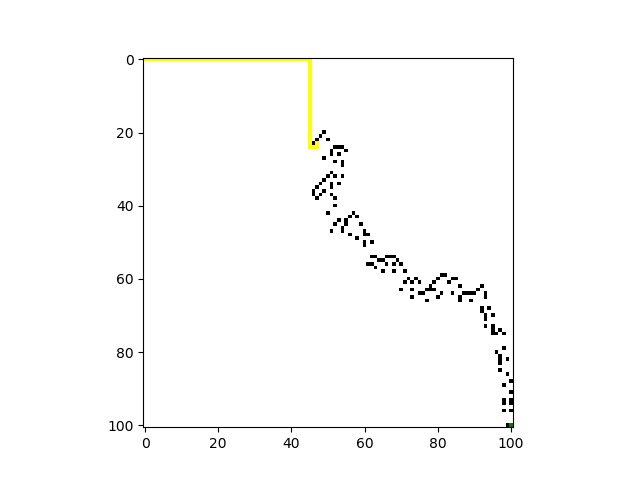

<IPython.core.display.Javascript object>


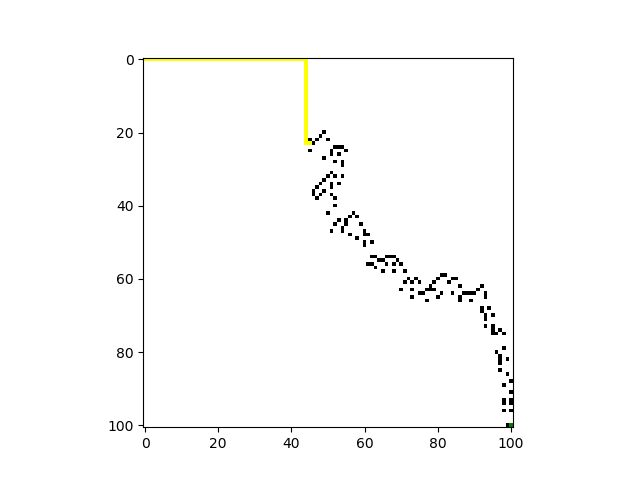

<IPython.core.display.Javascript object>


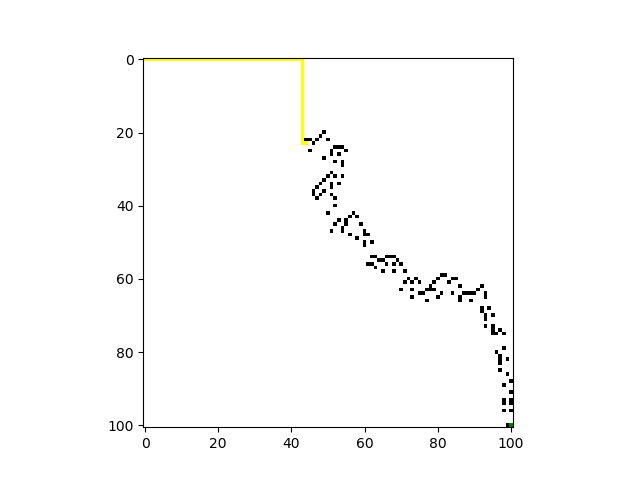

<IPython.core.display.Javascript object>


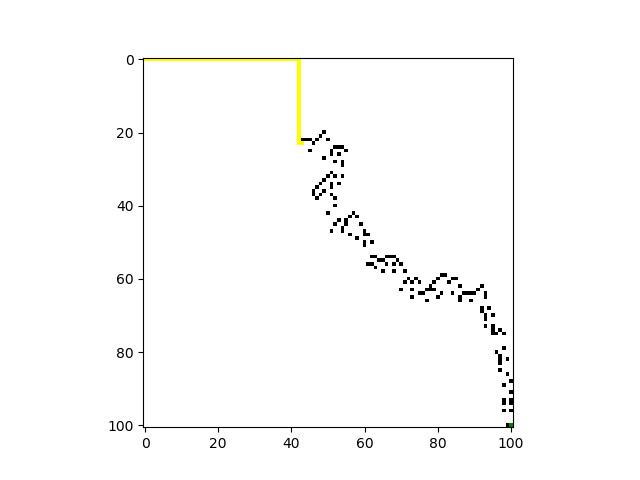

<IPython.core.display.Javascript object>


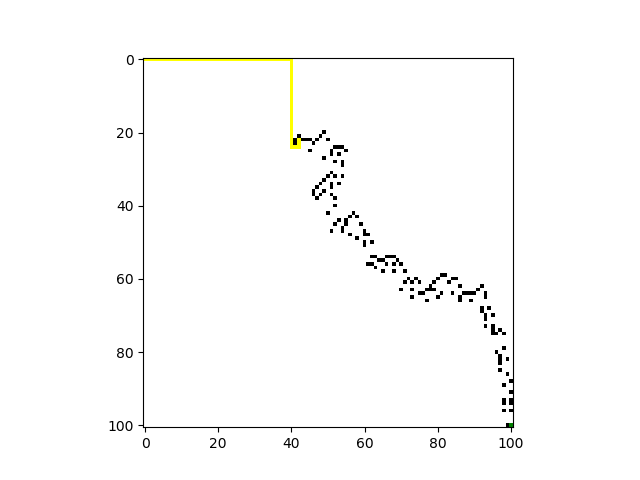

<IPython.core.display.Javascript object>


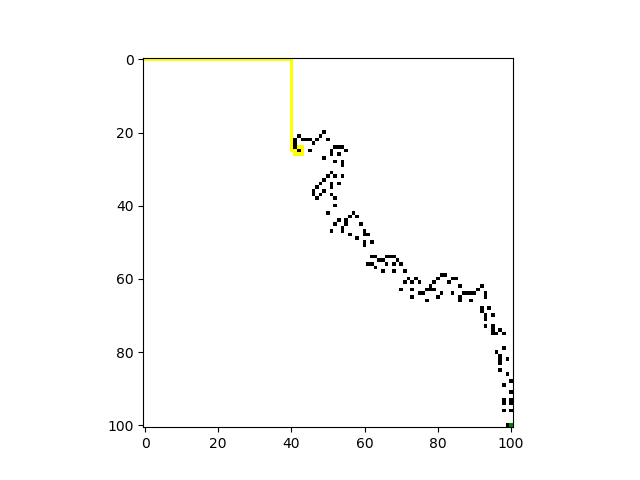

<IPython.core.display.Javascript object>


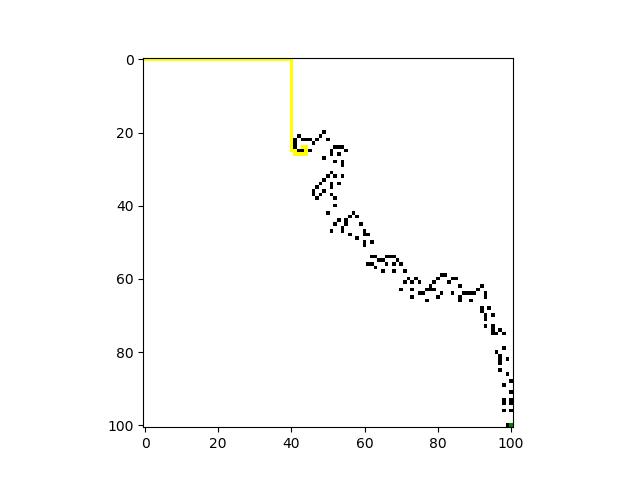

<IPython.core.display.Javascript object>


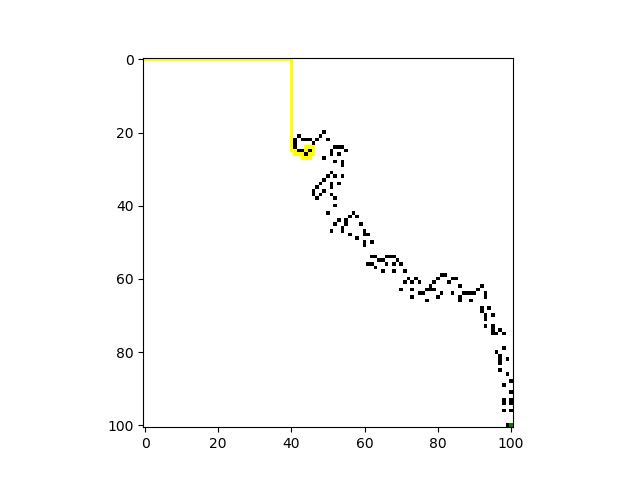

<IPython.core.display.Javascript object>


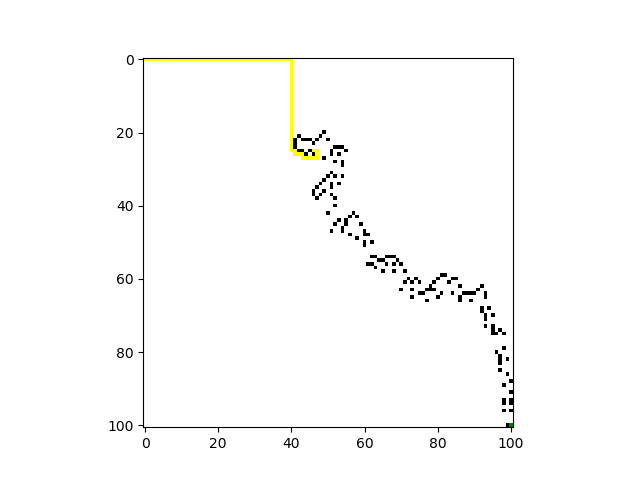

<IPython.core.display.Javascript object>


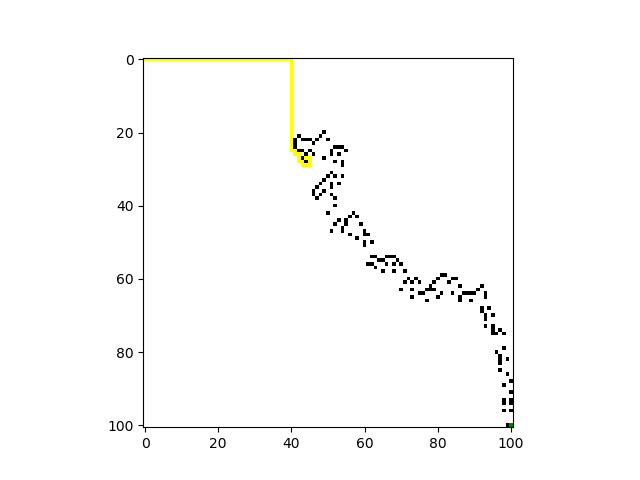

<IPython.core.display.Javascript object>


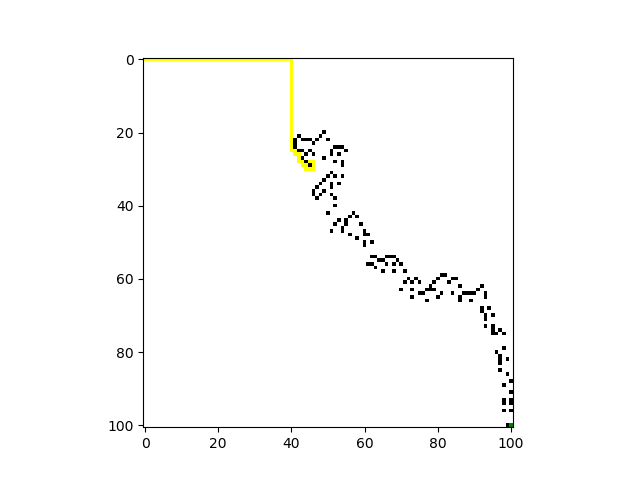

<IPython.core.display.Javascript object>


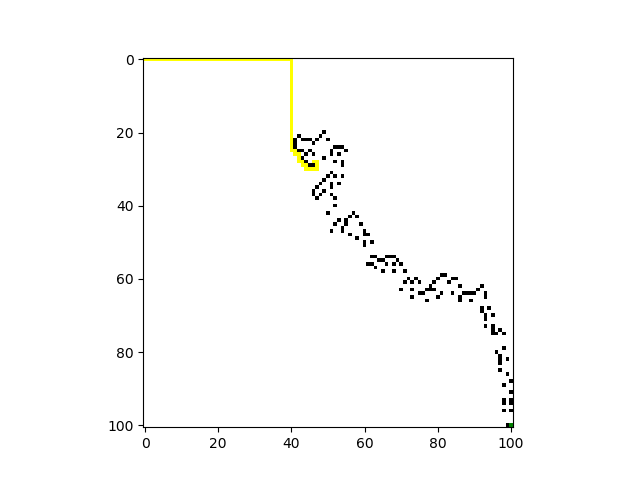

<IPython.core.display.Javascript object>


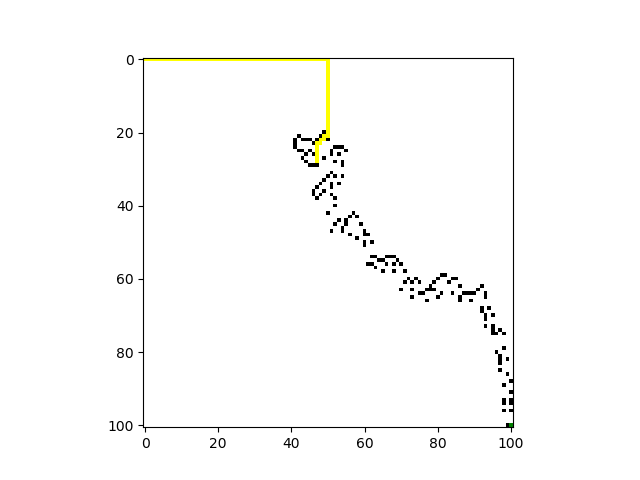

<IPython.core.display.Javascript object>


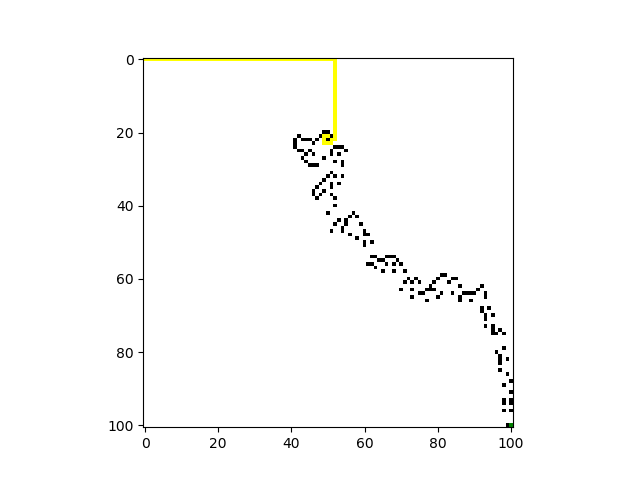

<IPython.core.display.Javascript object>


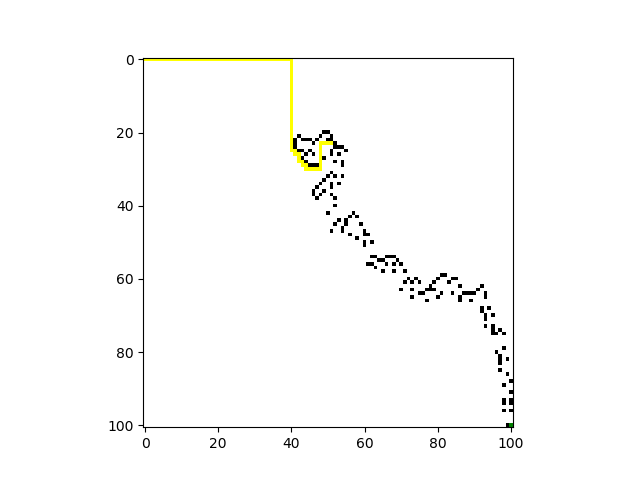

<IPython.core.display.Javascript object>


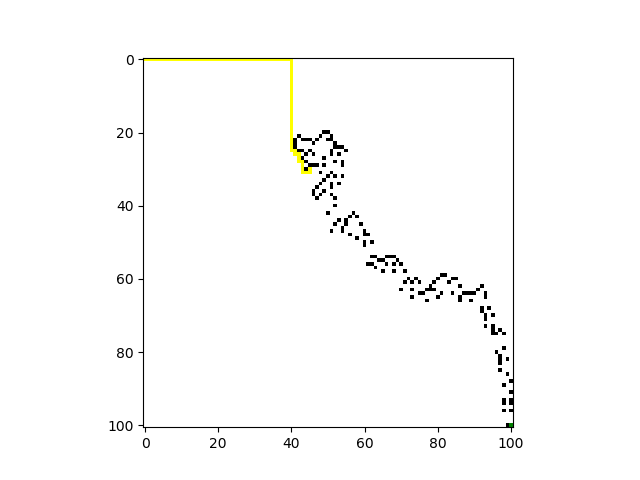

<IPython.core.display.Javascript object>


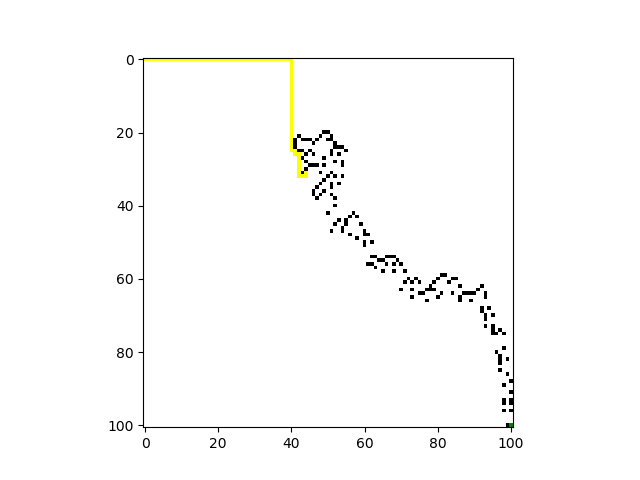

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7.567674160003662


In [50]:
def tracePath(maze, path):
    for coordinate in path:
        maze[coordinate] = 5
    return maze


#### CONFIGURATION ####
random.seed(122)
np.set_printoptions(threshold=np.inf)

color_set = ['white', 'black', 'green', 'red', 'yellow']
range_set = np.array([-0.5,0.5,2.5,3.5,4.5,5.5])

cmap = colors.ListedColormap(color_set)
norm = colors.BoundaryNorm(range_set, len(color_set))

console = False

#### PARAMETERS #####
size = 101
probability = 0.7
method = "backwards"

#create actual maze and knowledge maze
trueMaze = np.zeros(shape = (size,size)).astype(int)
knowledgeMaze = np.zeros(shape = (size,size)).astype(int)

# populate actual maze
for x in np.nditer(trueMaze, op_flags=['readwrite']):
    if random.random() >= probability:
        x[...] = 1
    else:
        x[...] = 0

# set start and end points
trueMaze[0,0] = 3
trueMaze[size-1,size-1] = 4
knowledgeMaze[0,0] = 3
knowledgeMaze[size-1,size-1] = 4


########## TESTING ##################

start_time = time.time()

if(method == "forwards"):
    # give knowledge maze initial knowledge
    if trueMaze[1,0] == 1:
        knowledgeMaze[1,0] = 1
    if trueMaze[0,1] == 1:
        knowledgeMaze[0,1] = 1
    path = repeatedAStar(knowledgeMaze, trueMaze, (0,0), (size-1,size-1), size, console)

elif(method == "backwards"):
    trueMaze[0,0] = 4
    trueMaze[size-1,size-1] = 3
    knowledgeMaze[0,0] = 4
    knowledgeMaze[size-1,size-1] = 3

    if trueMaze[size-2,size-1] == 1:
        knowledgeMaze[size-2,size-1] = 1
    if trueMaze[size-1,size-2] == 1:
        knowledgeMaze[size-1,size-2] = 1
    path = repeatedAStar(knowledgeMaze, trueMaze, (size-1, size-1), (0,0), size, console)

elif(method == "adaptive"):
    path = adaptiveAStar.adpativeAStar(knowledgeMaze, (0,0), (size-1,size-1), console)
else:
    print("invalid option")

end_time = time.time()


if console:
    print("true maze: ")
    print(trueMaze)

plt.imshow(trueMaze, cmap=cmap, norm=norm)
plt.show()

if console:
    print("answer: ")
    print(path)

plt.imshow(knowledgeMaze, cmap=cmap, norm=norm)
plt.show()

# DISPLAY PARTIAL PATHS
for index, partial in enumerate(path[0]):
    pathMaze = tracePath(path[1][index], partial)
    plt.imshow(pathMaze, cmap=cmap, norm=norm)
    plt.show()

final_time = time.time()

print(final_time - start_time)